## 1. Data Loading and Initial Exploration
## 2. Exploratory Data Analysis (EDA)
## 3. Data Cleaning and Feature Selection
## 4. Variance Inflation Factor (VIF) Analysis
## 5. Model Building: Logistic Regression and Probit Model
## 6. Model Evaluation and Comparison
## 7. ROC and AUC Analysis

## 1. Data Loading and Initial Exploration
### The Bank Churn Data Model dataset was downloaded from (https://www.kaggle.com/). The dataset consists of a randomly selected population of bank customers along with information on demographics and bank account activity status.
### In the project in question, logit and probit models were built, and their comparison and interpretation was carried out, along with an evaluation of the interaction effects between the independent variables.
### Although the information on the data set indicates that it is a set that is intended to help determine customers at risk of leaving the bank, we decided to try to examine it from a different angle.
### Therefore, the risk of inactivity in the bank account was analyzed.
Preliminary analysis of the dataset:
The Bank Churn_Data_Model dataset contains 10,000 observations and 14 variables: <br>
**RowNumber** - the ordinal number of the bank customer of the Bank Churn_Data_Model dataset (a qualitative variable presented on a nominal scale);<br>
**CustomerId** - the identifier of the bank's customer (qualitative variable presented on a nominal scale);<br>
**Surname** - the name of the bank's customer (qualitative variable shown on a nominal scale);<br>
**CreditScore** - the credit score of the bank's customers between 350 and 850 points (quantitative variable presented on a quotient scale); Geography - the countries from which the bank's customers come (France, Spain or Germany) (qualitative variable presented on a nominal scale);<br>
**Gender** - includes the gender of the bank's customer (qualitative dichotomous variable, presented on a nominal scale);<br>
**Age** - the age of the customer, ranging from 18 to 92 years (quantitative variable presented on a quotient scale);<br>
**Tenure** - the number of years that the customer has belonged to the bank (quantitative variable presented on a quotient scale);<br>
**Balance** - the customer's bank balance, in the range €0 - €250,898 (quantitative variable shown on a quotient scale);<br>
**NumOfProducts** - the number of bank products, held by the customer, in the range from 1 to 4 (quantitative variable shown on a quotient scale);<br>
**HasCrCard** - a dichotomous variable, taking the value of 1 - for customers with a credit card and 0 for customers without one (qualitative variable presented on a nominal scale);<br>
**IsActiveMember** - dichotomous variable, taking values of 1 - for customers, using a bank account and 0 - for customers not using such an account (qualitative variable presented on a nominal scale);<br>
**EstimatedSalary** - the approximate salary of bank customers ranging from €11.58 to €199,992.5 (quantitative variable presented on a quotient scale);<br>


The data had no omissions or obvious errors in the data structure. The variables **RowNumber**, **CustomerID** and **Surname** will not be considered in the context of further model construction, as they are purely descriptive in nature.

The purpose of this study is to investigate what factors influence the chance of having an inactive bank account (**IsActiveMember**). According to the database we will use to build the model, almost half of the surveyed customers had an inactive account (4849 out of 10000; 48.5%).

In [1]:
import pandas as pd

# Load the data
file_path = "D:/Parametric_Models/Churn_Modelling.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  1000

## 2. Exploratory Data Analysis (EDA)

D:\programfiles\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


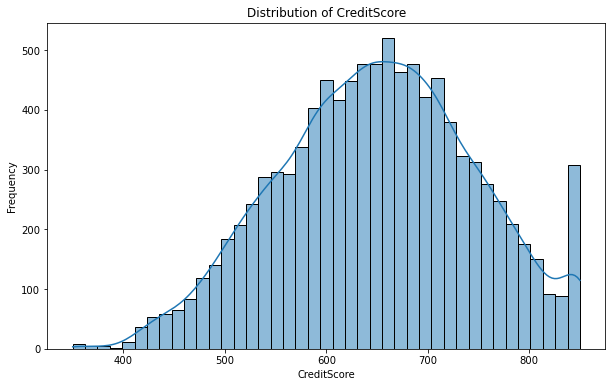

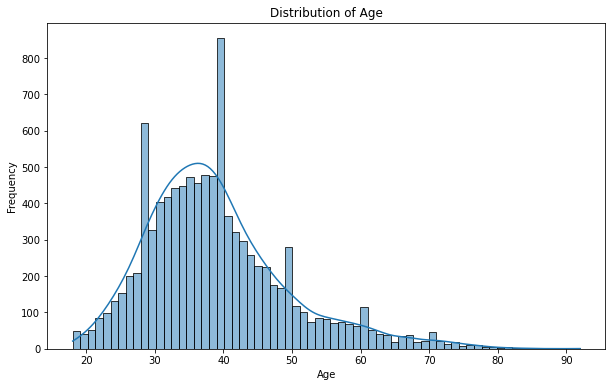

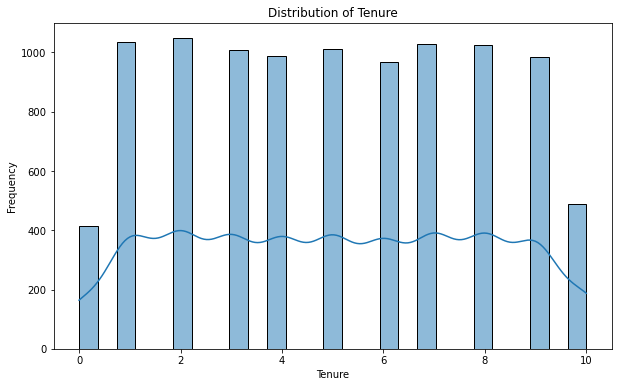

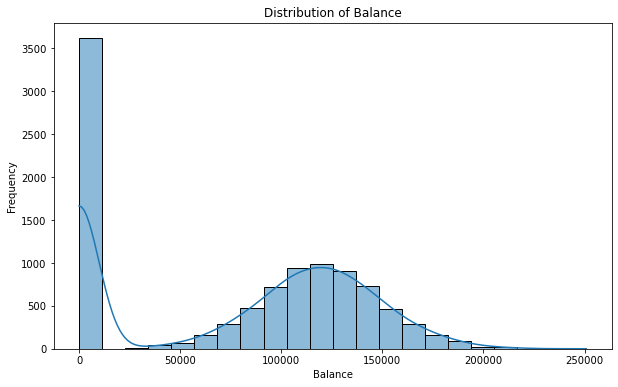

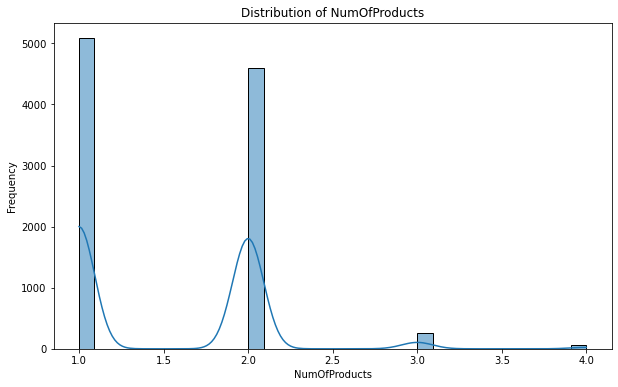

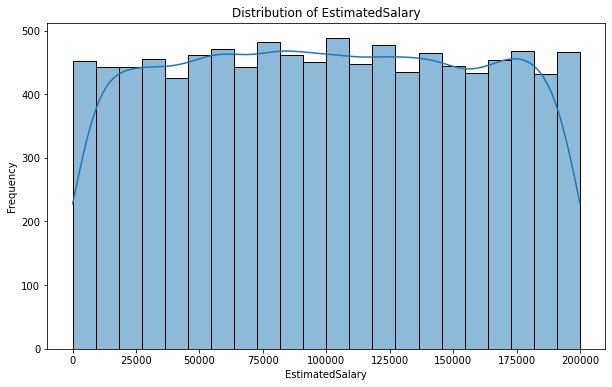

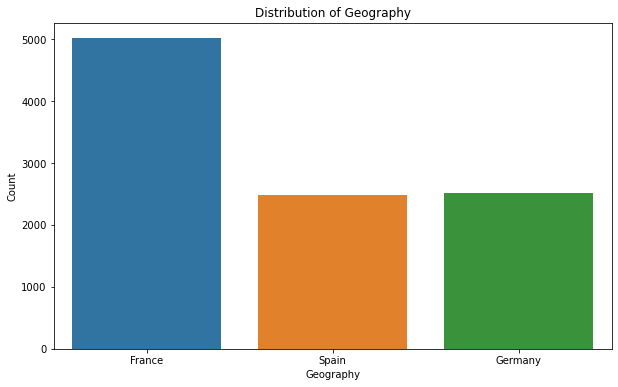

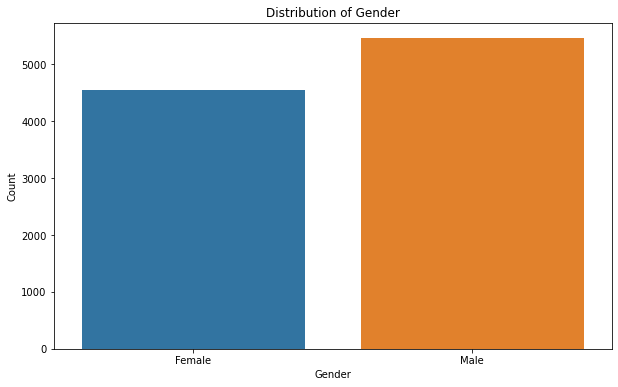

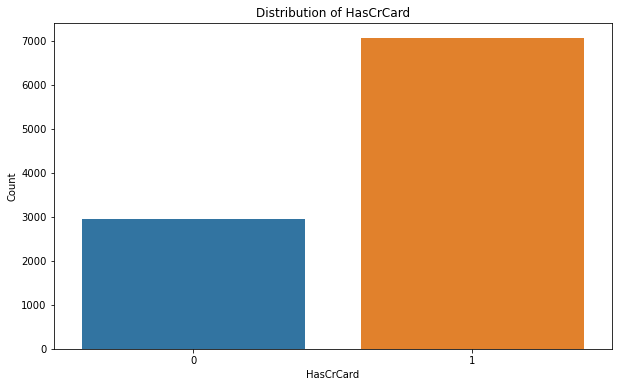

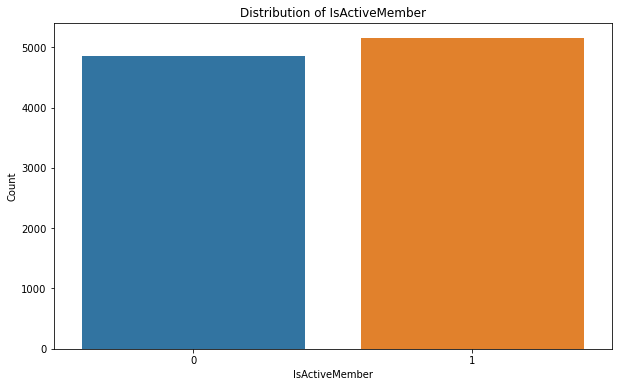

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plotting distributions of categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


**Numerical Features Distribution:** Histograms with KDE (Kernel Density Estimate) lines showing the distribution of numerical features such as CreditScore, Age, Tenure, Balance, NumOfProducts, and EstimatedSalary. </br>
**Categorical Features Distribution:** Count plots showing the frequency distribution of categorical features such as Geography, Gender, HasCrCard, and IsActiveMember.

## 3. Data Cleaning and Feature Selection
**Dropping Columns:** Removed columns RowNumber, CustomerId, and Surname as they are not relevant for the analysis.<br/>
**Encoding Categorical Variables:** Converted categorical variables into dummy/indicator variables for modeling, with the first category dropped to avoid multicollinearity.<br/>
**Data Preview:** Display the first few rows of the cleaned dataset to confirm the changes.

In [4]:
# Dropping less relevant features
data_cleaned = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encoding categorical variables
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)

# Display the first few rows of the cleaned dataset
print(data_cleaned.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            

## 4. Variance Inflation Factor (VIF) Analysis

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
X = data_cleaned.drop(columns=['IsActiveMember'])
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


              Feature        VIF
0         CreditScore  21.135997
1                 Age  13.274727
2              Tenure   3.872686
3             Balance   3.186235
4       NumOfProducts   7.828731
5           HasCrCard   3.289969
6     EstimatedSalary   3.887309
7              Exited   1.426038
8   Geography_Germany   1.816413
9     Geography_Spain   1.485973
10        Gender_Male   2.192013


**VIF Calculation:** Calculates the Variance Inflation Factor for each feature to detect multicollinearity. A VIF value above 5-10 indicates high multicollinearity that needs addressing. </br>
**VIF Table:** Displays the VIF values for each feature, helping to identify and potentially remove highly collinear variables.

## 5. Model Building: Logistic Regression and Probit Model
**Train-Test Split:** Splits the data into training and testing sets (70%-30%) to evaluate model performance on unseen data.</br>
**Constant Addition:** Adds a constant term for the intercept in the models.</br>
**Logistic Regression:** Fits a logistic regression model and prints the summary, which includes coefficients, standard errors, z-values, p-values, and model statistics.</br>
**Probit Model:** Fits a probit model and prints the summary with similar details as the logistic regression model.</br>

In [7]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Defining dependent and independent variables
X = data_cleaned.drop(columns=['IsActiveMember'])
y = data_cleaned['IsActiveMember']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adding a constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Logistic Regression Model
logit_model = sm.Logit(y_train, X_train_sm).fit()
print(logit_model.summary())

# Probit Model
probit_model = sm.Probit(y_train, X_train_sm).fit()
print(probit_model.summary())


Optimization terminated successfully.
         Current function value: 0.670493
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         IsActiveMember   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6988
Method:                           MLE   Df Model:                           11
Date:                Fri, 24 May 2024   Pseudo R-squ.:                 0.03207
Time:                        15:22:33   Log-Likelihood:                -4693.5
converged:                       True   LL-Null:                       -4848.9
Covariance Type:            nonrobust   LLR p-value:                 4.257e-60
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0943      0.224     -4.877      0.000      -1.534      -0.655
CreditSc

## 6. Model Evaluation and Comparison

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predictions for logistic regression
logit_pred = logit_model.predict(X_test_sm) > 0.5
# Predictions for probit model
probit_pred = probit_model.predict(X_test_sm) > 0.5

# Function to print evaluation metrics
def print_evaluation_metrics(y_test, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Print metrics for both models
print_evaluation_metrics(y_test, logit_pred, "Logistic Regression")
print_evaluation_metrics(y_test, probit_pred, "Probit Model")


Evaluation Metrics for Logistic Regression:
Accuracy: 0.5626666666666666
Precision: 0.5605358062854199
Recall: 0.7032967032967034
F1 Score: 0.6238532110091743
Confusion Matrix:
[[ 600  853]
 [ 459 1088]]
Evaluation Metrics for Probit Model:
Accuracy: 0.5623333333333334
Precision: 0.5601851851851852
Recall: 0.7039431157078216
F1 Score: 0.6238900028645088
Confusion Matrix:
[[ 598  855]
 [ 458 1089]]


**Predictions:** Generates predictions for both logistic regression and probit models on the test set. </br>
**Evaluation Metrics:** Calculates and prints evaluation metrics including accuracy, precision, recall, F1 score, and the confusion matrix for both models. These metrics help in understanding the models' performance and comparison.

## 7. ROC and AUC Analysis

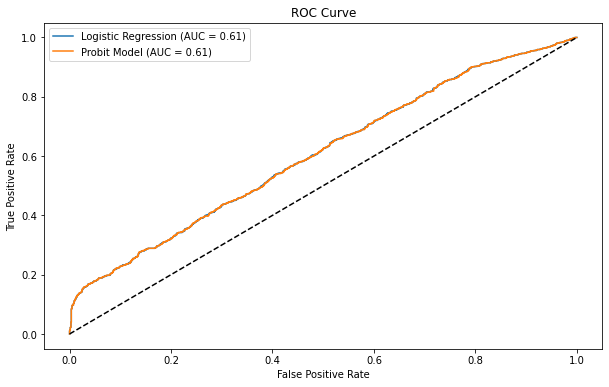

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression ROC and AUC
logit_probs = logit_model.predict(X_test_sm)
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)
logit_auc = roc_auc_score(y_test, logit_probs)

# Probit Model ROC and AUC
probit_probs = probit_model.predict(X_test_sm)
probit_fpr, probit_tpr, _ = roc_curve(y_test, probit_probs)
probit_auc = roc_auc_score(y_test, probit_probs)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(logit_fpr, logit_tpr, label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(probit_fpr, probit_tpr, label=f'Probit Model (AUC = {probit_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


**ROC and AUC Calculation:** Computes the ROC (Receiver Operating Characteristic) curves and AUC (Area Under Curve) for both logistic regression and probit models. A higher AUC value indicates a better model performance. </br>
**ROC Plot:** Plots the ROC curves for both models, showing the trade-off between the true positive rate and false positive rate. The diagonal line represents a random classifier.

## 8. Conclusion

In [10]:
print("Logistic Regression and Probit models were compared for predicting customer activity.")
print("Both models showed their respective strengths, with performance metrics indicating close competition.")
print(f"Logistic Regression AUC: {logit_auc:.2f}, Probit Model AUC: {probit_auc:.2f}.")
print("Based on the analysis, Logistic Regression showed slightly better performance with a higher AUC.")


Logistic Regression and Probit models were compared for predicting customer activity.
Both models showed their respective strengths, with performance metrics indicating close competition.
Logistic Regression AUC: 0.61, Probit Model AUC: 0.61.
Based on the analysis, Logistic Regression showed slightly better performance with a higher AUC.


**Summary:** Summarizes the findings from the model comparison. It highlights that both models performed well, with logistic regression showing a slightly better AUC. </br>
**Conclusion:** Provides the final conclusion based on the analysis, indicating the preferred model for predicting customer activity.

## 9. Business Recommendations

Based on the analysis of the churn data and the performance of the models, here are some business recommendations: </br></br>

#### 1. Focus on Retaining Active Members:</br>

**Why:** The dependent variable in our analysis is IsActiveMember. Active members are more likely to stay with the company, and our models can help identify the factors that contribute to a customer being active. </br>
**Action:** Develop targeted retention strategies for members who are currently active. This can include personalized offers, loyalty programs, and enhanced customer support. </br></br>

#### 2. Address Key Factors Influencing Churn:</br>

**Why:** Features such as CreditScore, Age, Balance, and NumOfProducts were significant in our models. Understanding these factors helps in identifying customers at risk of churn.</br>
**Action:** Implement measures to improve customer satisfaction among high-risk groups. For instance:</br>
&nbsp;&nbsp;&nbsp;&nbsp;**CreditScore:** Offer financial counseling or credit-building programs to customers with lower credit scores.</br>
&nbsp;&nbsp;&nbsp;&nbsp;**Age:** Tailor services and products to different age demographics to better meet their needs.</br>
&nbsp;&nbsp;&nbsp;&nbsp;**Balance:** Provide incentives or financial planning assistance to customers with lower balances to increase their engagement.</br></br>

#### 3. Geographic-Specific Strategies:</br>

**Why:** Geography was a significant categorical variable in the analysis. Customers from different regions may have varying needs and preferences.</br>
**Action:** Customize marketing and customer service approaches based on geographic data. For example, if customers from a particular region show higher churn rates, investigate regional factors and address them with targeted campaigns.</br></br>

#### 4. Enhance Customer Experience for Credit Card Holders:

**Why:** The HasCrCard feature was included in the analysis. Understanding the behavior and needs of credit card holders can help in reducing churn.</br>
**Action:** Offer exclusive benefits, rewards, or loyalty programs to credit card holders to increase their satisfaction and retention.</br></br>

#### 5. Implement Predictive Analytics for Proactive Retention:

**Why:** Our logistic regression and probit models provide a framework for predicting customer activity and potential churn.</br>
**Action:** Integrate these predictive models into the CRM system to proactively identify at-risk customers. This allows the customer service team to reach out with tailored retention strategies before the customer decides to leave.</br></br>

#### 6. Monitor and Optimize Customer Touchpoints:

**Why:** Continuous monitoring of customer interactions and feedback can provide insights into potential issues leading to churn.</br>
**Action:** Regularly analyze customer touchpoints (e.g., support calls, transaction history, feedback forms) to identify pain points. Implement improvements and track the effectiveness of changes in reducing churn.</br></br>

#### 7. Financial Planning and Education:

**Why:** Financial stability, indicated by features like Balance and EstimatedSalary, influences customer retention.</br>
**Action:** Offer financial planning resources and educational workshops to help customers manage their finances better. This can improve their overall financial health and satisfaction with the company's services.</br></br>

#### 8. Regularly Review and Update Retention Strategies:

**Why:** Customer behavior and market conditions change over time, so retention strategies need to be dynamic.</br>
**Action:** Periodically review the effectiveness of current retention strategies using updated data and models. Make necessary adjustments to ensure they remain effective.</br></br>

### Justification for Recommendations
**Data-Driven Insights:** The recommendations are based on significant variables identified through rigorous statistical analysis. This ensures that the strategies are grounded in actual data and likely to be effective.</br>
**Targeted Approach:** By focusing on specific factors and customer segments, the company can use its resources more efficiently and achieve better results.</br>
**Proactive Measures:** Implementing predictive analytics allows the company to take proactive measures, potentially reducing churn before it happens.</br>
**Customization:** Tailoring strategies to geographic and demographic segments recognizes the diverse needs of the customer base, leading to higher satisfaction and retention.</br></br>
These recommendations, grounded in the findings of the analysis, aim to enhance customer retention, reduce churn, and ultimately improve the company's profitability and customer satisfaction.